# 과제2_Part2_120220243_황상민

# Modeling

Part2에는 Part1에서 수집된 데이터를 불러와서 CNN 모델에 적용하는 코드를 담고 있다.

# 1. Install and import libraries


In [1]:
# upgrade fastai to the most recent version (v. 2.5.3)

%%capture
!pip install fastai --upgrade
!pip install opencv --upgrade

In [2]:
import fastai
print(fastai.__version__)

from fastai.vision.all import *
#from fastai.text.all import *
#from fastai.collab import *
#from fastai.tabular.all import * 

from matplotlib.pyplot import imshow

2.6.3


In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from google.colab import files


# 2. Download file

In [ ]:
!wget -O 과제2.zip 'https://www.dropbox.com/s/zsaxg8e5u2qtwm6/%EA%B3%BC%EC%A0%9C2.zip?dl=0'

--2022-05-20 03:59:47--  https://www.dropbox.com/s/zsaxg8e5u2qtwm6/%EA%B3%BC%EC%A0%9C2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zsaxg8e5u2qtwm6/%EA%B3%BC%EC%A0%9C2.zip [following]
--2022-05-20 03:59:48--  https://www.dropbox.com/s/raw/zsaxg8e5u2qtwm6/%EA%B3%BC%EC%A0%9C2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdc5cf8a34429d30a5d23e49a0c.dl.dropboxusercontent.com/cd/0/inline/BlnV_F3hg-CBaaSzdYIsGhQ2hEuSHyUdsu4m7JCXF5ZtVcFitEbbnx5DwPHi45-MqHImlipONuV92vb76WbClI8TDQiie_VADTU3myQ3HsPqoZd4yaBcdBbrS9hgKaATyCKM1tat-WKMi94XjXWAhE0oG404W1kRQBaC2pgqIGfL8w/file# [following]
--2022-05-20 03:59:48--  https://ucdc5cf8a34429d30a5d23e49a0c.dl.dropboxusercontent.com/cd/0/inline/BlnV_F3hg-CBaaSzdYIsGhQ2hEuSHy

In [ ]:
%%capture

!unzip 과제2.zip -d detergent

# 3. Prepare image file path + label dataframe

## 3.1. grab image file paths

In [ ]:
df_detergent = pd.read_csv('detergent/coupang_세제_26pages_list.csv')
df_detergent.head()

,file_name,product_type,product_name,base_price,price,product_page,product_url
0,coupang_1page_세제_000001.jpg,세제,"쿤달 초고농축 파워 겔 부스터 액상 세탁세제 본품, 2개, 1580ml","17,500","16,500",1,https://www.coupang.com/vp/products/5379789393?itemId=7988162342&vendorItemId=75277055014&sourceType=srp_product_ads&clickEventId=940ca547-590e-4cc0-900c-3b280b303fb5&korePlacement=15&koreSubPlacement=1&clickEventId=940ca547-590e-4cc0-900c-3b280b303fb5&korePlacement=15&koreSubPlacement=1
1,coupang_1page_세제_000002.jpg,세제,"탐사 파워워시 액체세제, 2.5L, 4개","14,900","9,840",1,https://www.coupang.com/vp/products/305732568?itemId=963650372&vendorItemId=5366789544
2,coupang_1page_세제_000003.jpg,세제,"리큐 진한겔 하이브리드 액상세제 일반용 리필, 2.1L, 4개","21,500","18,900",1,https://www.coupang.com/vp/products/3170867?itemId=109772804&vendorItemId=3116820080&pickType=COU_PICK
3,coupang_1page_세제_000004.jpg,세제,"줌 베이직 베이킹소다 담은 액체 세탁세제, 2.5L, 4개","13,900","11,940",1,https://www.coupang.com/vp/products/181981575?itemId=522347757&vendorItemId=4351244353
4,coupang_1page_세제_000005.jpg,세제,"리큐 진한겔 하이브리드 액상세제 일반용 리필, 2.1L, 6개","47,880","22,410",1,https://www.coupang.com/vp/products/3170867?itemId=53566694&vendorItemId=3083724771&sourceType=srp_product_ads&clickEventId=7432ebf6-301a-457d-aed9-8be32d1c3959&korePlacement=15&koreSubPlacement=5&clickEventId=7432ebf6-301a-457d-aed9-8be32d1c3959&korePlacement=15&koreSubPlacement=5


In [ ]:
# grab image file paths

import glob
img_full_path = pd.Series(glob.glob('detergent/*.jpg'), name='my_file_path')
img_nm = pd.Series(img_full_path.str.split(pat="/").str[1], name='file_name')

df_img = pd.concat([img_full_path, img_nm], axis=1)
df_img

,my_file_path,file_name
0,detergent/coupang_15page_세제_000531.jpg,coupang_15page_세제_000531.jpg
1,detergent/coupang_7page_세제_000268.jpg,coupang_7page_세제_000268.jpg
2,detergent/coupang_10page_세제_000360.jpg,coupang_10page_세제_000360.jpg
3,detergent/coupang_20page_세제_000716.jpg,coupang_20page_세제_000716.jpg
4,detergent/coupang_6page_세제_000214.jpg,coupang_6page_세제_000214.jpg
...,...,...
918,detergent/coupang_20page_세제_000724.jpg,coupang_20page_세제_000724.jpg
919,detergent/coupang_19page_세제_000678.jpg,coupang_19page_세제_000678.jpg
920,detergent/coupang_8page_세제_000275.jpg,coupang_8page_세제_000275.jpg
921,detergent/coupang_21page_세제_000767.jpg,coupang_21page_세제_000767.jpg


## 3.2 grab ground truth dataset

In [ ]:
df_detergent_img = pd.merge(df_detergent, df_img, left_on='file_name', right_on='file_name')
df_detergent_img.head()

,file_name,product_type,product_name,base_price,price,product_page,product_url,my_file_path
0,coupang_1page_세제_000001.jpg,세제,"쿤달 초고농축 파워 겔 부스터 액상 세탁세제 본품, 2개, 1580ml","17,500","16,500",1,https://www.coupang.com/vp/products/5379789393?itemId=7988162342&vendorItemId=75277055014&sourceType=srp_product_ads&clickEventId=940ca547-590e-4cc0-900c-3b280b303fb5&korePlacement=15&koreSubPlacement=1&clickEventId=940ca547-590e-4cc0-900c-3b280b303fb5&korePlacement=15&koreSubPlacement=1,detergent/coupang_1page_세제_000001.jpg
1,coupang_1page_세제_000002.jpg,세제,"탐사 파워워시 액체세제, 2.5L, 4개","14,900","9,840",1,https://www.coupang.com/vp/products/305732568?itemId=963650372&vendorItemId=5366789544,detergent/coupang_1page_세제_000002.jpg
2,coupang_1page_세제_000003.jpg,세제,"리큐 진한겔 하이브리드 액상세제 일반용 리필, 2.1L, 4개","21,500","18,900",1,https://www.coupang.com/vp/products/3170867?itemId=109772804&vendorItemId=3116820080&pickType=COU_PICK,detergent/coupang_1page_세제_000003.jpg
3,coupang_1page_세제_000004.jpg,세제,"줌 베이직 베이킹소다 담은 액체 세탁세제, 2.5L, 4개","13,900","11,940",1,https://www.coupang.com/vp/products/181981575?itemId=522347757&vendorItemId=4351244353,detergent/coupang_1page_세제_000004.jpg
4,coupang_1page_세제_000005.jpg,세제,"리큐 진한겔 하이브리드 액상세제 일반용 리필, 2.1L, 6개","47,880","22,410",1,https://www.coupang.com/vp/products/3170867?itemId=53566694&vendorItemId=3083724771&sourceType=srp_product_ads&clickEventId=7432ebf6-301a-457d-aed9-8be32d1c3959&korePlacement=15&koreSubPlacement=5&clickEventId=7432ebf6-301a-457d-aed9-8be32d1c3959&korePlacement=15&koreSubPlacement=5,detergent/coupang_1page_세제_000005.jpg


In [ ]:
# check if missing variable
# product_page만 있으면 되므로 base_price의 null값은 무시한다.
# 즉, 불필요한 데이터 손실은 피한다.
df_detergent_img.isnull().sum()

file_name         0
product_type      0
product_name      0
base_price      349
price             0
product_page      0
product_url       0
my_file_path      0
dtype: int64

In [ ]:
df_detergent_img.shape

(923, 8)

# 4. Prepare data for CNN

In [ ]:
# data block settings

my_random_seed = 42
my_batch_size = 64

In [ ]:
from fastai.vision.data import ImageDataLoaders

In [ ]:
df_detergent_cnn = df_detergent_img[['my_file_path', 'product_page']]
df_detergent_cnn.head()

,my_file_path,product_page
0,detergent/coupang_1page_세제_000001.jpg,1
1,detergent/coupang_1page_세제_000002.jpg,1
2,detergent/coupang_1page_세제_000003.jpg,1
3,detergent/coupang_1page_세제_000004.jpg,1
4,detergent/coupang_1page_세제_000005.jpg,1


In [ ]:
cnn_data = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_x=ColReader('my_file_path'), 
    get_y=ColReader('product_page'),
    splitter=RandomSplitter(valid_pct=0.3, seed=my_random_seed),
    item_tfms=RandomResizedCrop(128, min_scale=0.2) # 간단한 Randome Resized Crop만 적용. 상품 사진은 잘 준비된 상태에서 찍으므로 과한 image data augmentation을 필요없다고 판단하였다.
).dataloaders(df_detergent_cnn)

In [ ]:
len(cnn_data.train_ds), len(cnn_data.valid_ds)

(647, 276)

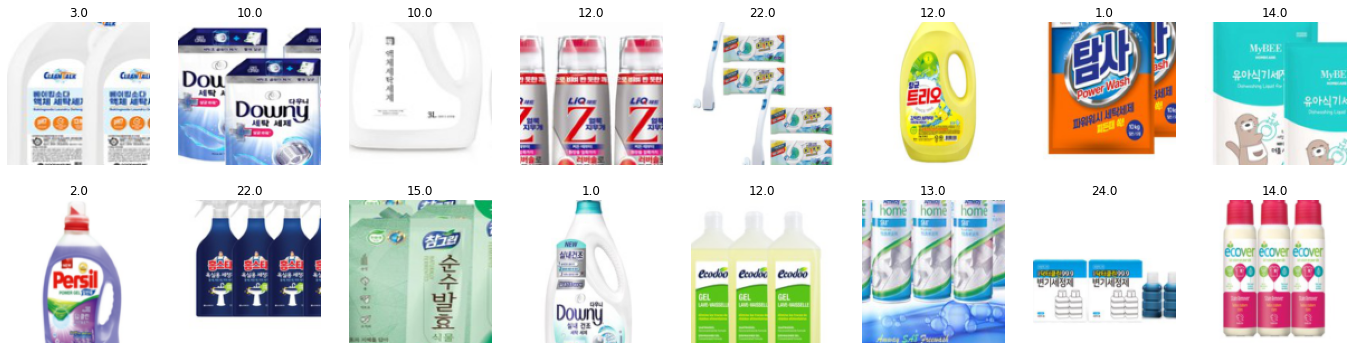

In [ ]:
# show image examples
cnn_data.show_batch(max_n=16, nrows=2)

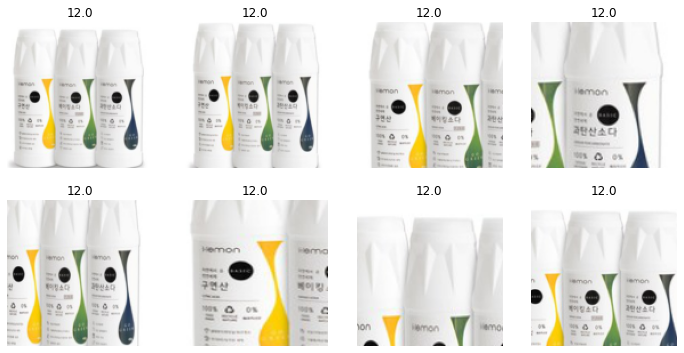

In [ ]:
# Randome Resized Crop 적용 확인
cnn_data.train.show_batch(max_n=8, nrows=2, unique=True)

#/ㅠㅠ******                       5. Train CNN model

Root Mean Square Error (RMSE) : 편차 제곱의 평균에 루트를 씌운 값.

RMSE를 기준으로 성능을 올리면, 이는 표준편차를 기준으로 하기때문에, 큰 에러를 최대한 줄이는 방향으로 학습

즉, 일관적인 예측 성능을 유지하도록 학습한다.

e.g. 정답이 9인 경우 9, 9, 6, 9 보다 8, 8, 8 ,8 를 좋게 평가


In [ ]:
#learn = 'change metric to rmse'

trained_model = cnn_learner(cnn_data, resnet34, metrics=rmse, y_range =(1,26) ).to_fp16() # resnet 18, 34, 50, 101, 152
trained_model.fine_tune(100, cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=10),SaveModelCallback(monitor='valid_loss')]) # early stopping

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,_rmse,time
0,102.842796,114.855515,10.717067,00:08


Better model found at epoch 0 with valid_loss value: 114.85551452636719.


epoch,train_loss,valid_loss,_rmse,time
0,102.377136,95.919044,9.793827,00:06
1,97.450439,80.590897,8.977243,00:05
2,91.171196,72.668159,8.524563,00:05
3,88.098000,71.709869,8.468168,00:05
4,85.111176,68.093918,8.251904,00:05
5,80.862747,66.948692,8.182218,00:05
6,77.709610,63.776241,7.986003,00:06
7,75.365242,64.684631,8.042676,00:05
8,73.637611,65.344223,8.083577,00:05
9,70.866058,65.834679,8.113857,00:05


Better model found at epoch 0 with valid_loss value: 95.9190444946289.
Better model found at epoch 1 with valid_loss value: 80.59089660644531.
Better model found at epoch 2 with valid_loss value: 72.66815948486328.
Better model found at epoch 3 with valid_loss value: 71.70986938476562.
Better model found at epoch 4 with valid_loss value: 68.09391784667969.
Better model found at epoch 5 with valid_loss value: 66.94869232177734.
Better model found at epoch 6 with valid_loss value: 63.776241302490234.
Better model found at epoch 12 with valid_loss value: 63.04585647583008.
Better model found at epoch 13 with valid_loss value: 62.4559211730957.
Better model found at epoch 14 with valid_loss value: 60.758811950683594.
Better model found at epoch 24 with valid_loss value: 58.9437370300293.
Better model found at epoch 25 with valid_loss value: 54.6263542175293.
Better model found at epoch 29 with valid_loss value: 53.17495346069336.
Better model found at epoch 31 with valid_loss value: 52.714

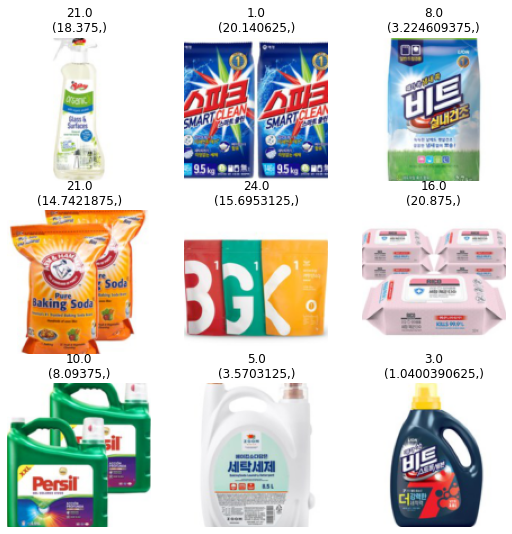

In [ ]:
trained_model.show_results()

In [ ]:
trained_model.validate()

(#2) [43.802825927734375,6.618370532989502]

# ⚓ 결과 ⚓
예측 대상인 페이지의 범위가 1~26이다. 그런데 Validation Dataset에 대한 RMSE는 7 이상이다.<br>
즉, 평균적으로 정답값에서 7 이상 틀리게 예측한다.<br>
이는 페이지값 범위의 25% 이상을 차지하는 비율이다. <br>

쿠팡에서 세제를 키워드로 검색했을 때 이미지를 기반으로 상품이 위치할 페이지 번호를 예측해본 결과, 이미지만으로 비교적 정확한 페이지 위치를 예측하기는 어렵다는 결론을 내릴 수 있다.그러나 페이지 번호 범위의 절반 이내에서 오차가 발생하므로 어느정도 상관관계는 있다고 판단할 수 있다. <br>

이번 과제의 결과를 일반화하여 적용하자면 e커머스 플랫폼에서는 상품의 이미지를 페이지 번호 배치에 어느정도 고려한다고 볼 수 있다. 따라서 e커머스 플랫폼에 새로운 상품을 판매하고자 할 때, 소비자에게 노출되는 상품의 이미지도 어느정도 고려해야 상위 페이지를 부여받을 수 있다. 그러나 상품의 이미지만으로는 상품의 페이지 번호 부여의 상관성을 완전히 설명하기는 제한되므로 소비자 후기, 상품 가격, 상품 설명 충실도 등의 요소를 신경쓸 필요가 있다.
